In [31]:
def Auto_radar_plot(v, labels, selfcolor=None, legend=None, labelsize=20, linewidth=2, vmin=None, vmax=None, space=None, title=' ', ifsave='no', savename=None):
    import numpy as np
    import matplotlib.pyplot as plt

    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False

    v_array = np.array(v)
    labels_array = np.array(labels)
    num_vars = len(labels_array)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False)
    angles_closed = np.concatenate([angles, [angles[0]]])

    # 自动颜色: 支持多组或单组
    if selfcolor is None:
        colorlist = ['skyblue', 'salmon', 'limegreen', 'orange', 'violet', 'gold', 'deepskyblue']
    elif isinstance(selfcolor, (list, tuple, np.ndarray)):
        colorlist = list(selfcolor)
    else:
        colorlist = [selfcolor]
    
    # 保证 v_array 是二维
    if v_array.ndim == 1:
        v_array = v_array[np.newaxis, :]
    n_group = v_array.shape[0]

    fig, ax = plt.subplots(subplot_kw={'polar': True}, figsize=(8, 8), facecolor='white')
    ax.spines['polar'].set_visible(False)
    ax.set_xticks([])
    ax.set_yticks([])

    for i in range(n_group):
        values = v_array[i]
        values_closed = np.concatenate([values, [values[0]]])
        color = colorlist[i % len(colorlist)]
        label = None
        if legend is not None and i < len(legend):
            label = legend[i]
        ax.plot(angles_closed, values_closed, 'o-', linewidth=linewidth, color=color, label=label)
        ax.fill(angles_closed, values_closed, color=color, alpha=0.25)
    
    ax.set_thetagrids(np.degrees(angles), labels_array, fontsize=labelsize)
    ax.xaxis.set_tick_params(pad=15+(labelsize-20)*1)
    all_values = v_array.flatten()
    if vmax is None and vmin is None:
        ax.set_ylim(np.nanmin(all_values), np.nanmax(all_values))
    else:
        ax.set_ylim(vmin, vmax)
    ax.grid(True)
    if vmax is None and vmin is None and space is None:
        ax.set_rgrids(np.linspace(np.nanmin(all_values), np.nanmax(all_values), 5), fontsize=labelsize-2)
    elif space is None:
        ax.set_rgrids(np.linspace(vmin, vmax, 5), fontsize=labelsize-2)
    elif vmax is None and vmin is None:
        ax.set_rgrids(np.linspace(np.nanmin(all_values), np.nanmax(all_values), space), fontsize=labelsize-2)
    else:
        ax.set_rgrids(np.linspace(vmin, vmax, space), fontsize=labelsize-2)
    ax.set_title(title, y=1.0+labelsize*0.005, fontsize=labelsize)
    
    if legend is not None:
        ax.legend(loc='upper right', bbox_to_anchor=(1.1+(labelsize-20)*0.04, 1.1), fontsize=labelsize-2, frameon=True)
    
    plt.show()
    
    if ifsave == 'yes' and savename is not None:
        fig.savefig(savename, dpi=300)

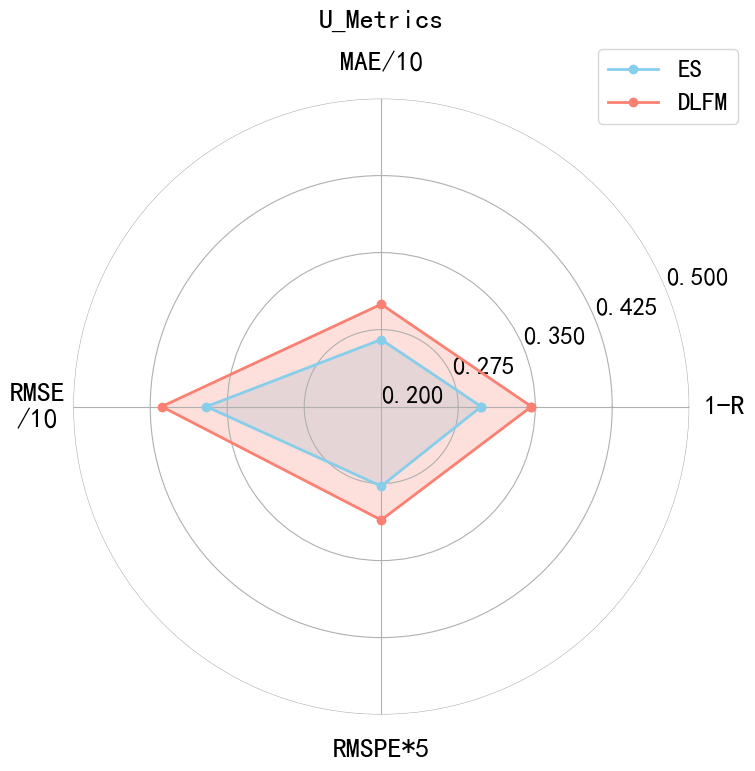

In [27]:
Auto_radar_plot([[1-0.7026,2.6532/10.0,3.7020/10.0,0.0555*5],[1-0.6537,2.9970/10.0,4.1380/10.0,0.0621*5]], ['1-R','MAE/10','RMSE\n/10','RMSPE*5'], selfcolor=None, legend=['ES','DLFM'], labelsize=20, linewidth=2, vmin=0.2, vmax=0.5, space=None, title='U_Metrics', ifsave='no', savename=None)

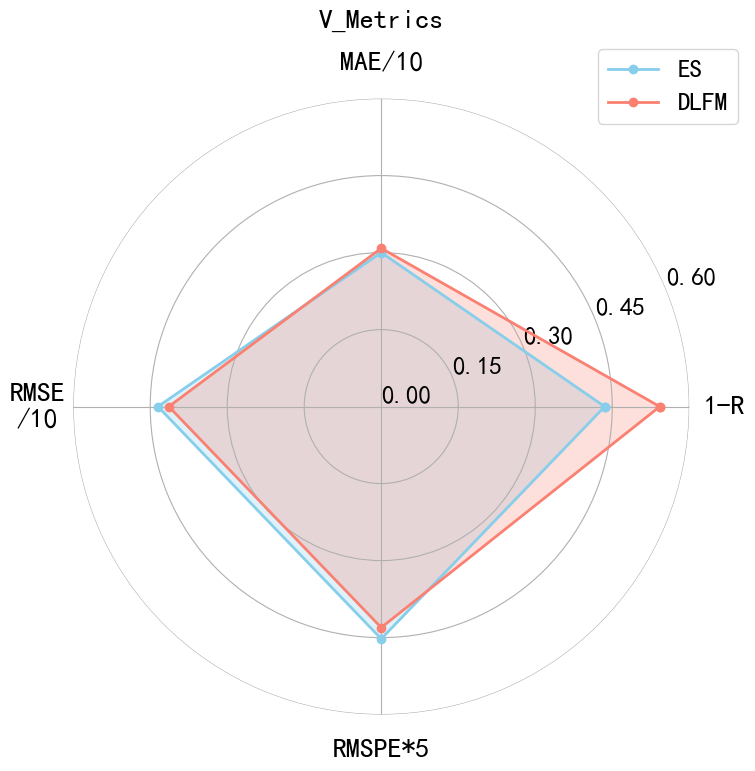

In [28]:
Auto_radar_plot([[1-0.5647,3.0009/10.0,4.3495/10.0,0.0905*5],[1-0.4574,3.0842/10,4.1380/10,0.0861*5,]], ['1-R','MAE/10','RMSE\n/10','RMSPE*5'], selfcolor=None, legend=['ES','DLFM'], labelsize=20, linewidth=2, vmin=0.0, vmax=0.6, space=None, title='V_Metrics', ifsave='no', savename=None)

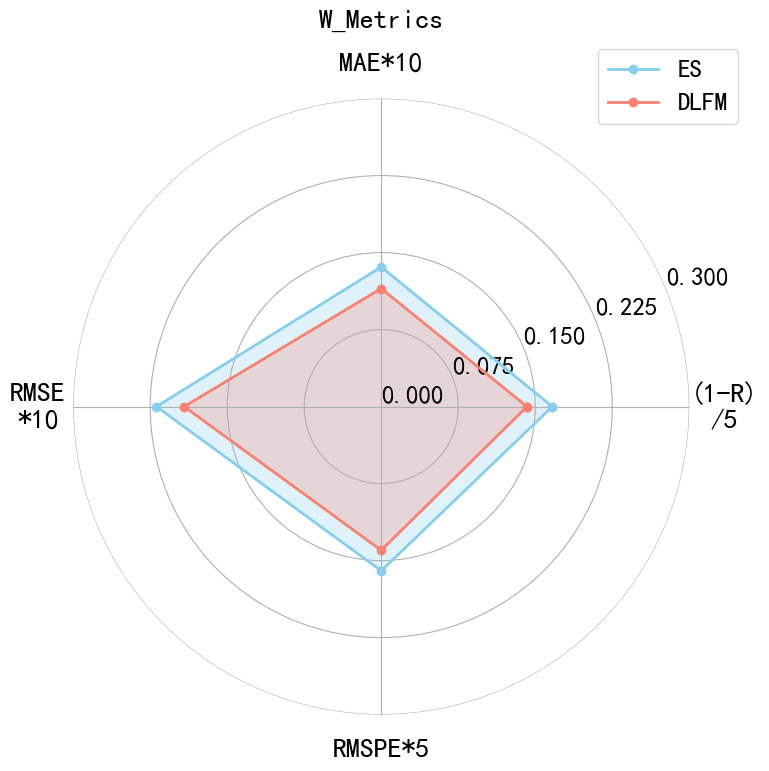

In [39]:
Auto_radar_plot([[(1-0.1668)/5,0.0136*10,0.0219*10,0.0320*5],[(1-0.2903)/5,0.0115*10,0.0192*10,0.0280*5]], ['(1-R)\n/5','MAE*10','RMSE\n*10','RMSPE*5'], selfcolor=None, legend=['ES','DLFM'], labelsize=20, linewidth=2, vmin=0.0, vmax=0.3, space=None, title='W_Metrics', ifsave='no', savename=None)